In [18]:
from util_functs import *
from pathlib import Path
from pydub.playback import play
from IPython.display import Audio
import time
import os
import shutil
from os.path import isdir
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import random
import imageio
import h5py


%reload_ext autoreload
%autoreload 2
%matplotlib inline
%pylab inline

np.random.seed(1)

Populating the interactive namespace from numpy and matplotlib


C:\Users\isaaa\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clip', 'random', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Setup
1. Generate audio clips using create_audio_clips
2. Generate melspectrograms using generate_melspecs
3. Store away data for testing
3. Fit CNN to data

Data cleaning:<br/>

1.<br/>
Isaac - First 25, last 3<br/>
Renan - None<br/>
2.<br/>
Isaac - clip0+clip1<br/>
Renan - None<br/>
3.<br/>
Isaac - clip0 <br/>
Renan - None<br/>
4.<br/>
Isaac - First 2<br/>
Renan - None<br/>
5.<br/>
Isaac - clip0<br/> 
Renan - last clip<br/>

In [25]:
ms_dir = 'input_ms/'
audio_dir = 'input_clips/'

folder_list = ['input_ms/', 'input_clips/', 'test_ms/']
for folder in folder_list:
    for the_file in os.listdir(folder):
        file_path = os.path.join(folder, the_file)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
        except Exception as e:
            print(e)

In [20]:
#Generate the training data + labels and the dataframe 
#containing name+label data
X_train, y_train, ms_df = generate_data((34,50,4), cl = 6, s = 0.5, createClips=True, genMelSpecs=True, storeTest=True)

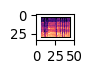

(34, 50, 4)


In [21]:
my_dpi=96
i=4
plt.figure(figsize=(50/my_dpi, 34/my_dpi), dpi=96)  #(34, 50)
img = imageio.imread(ms_dir+os.listdir(ms_dir)[i])
imgplot = plt.imshow(img)
plt.show()
print(img.shape)

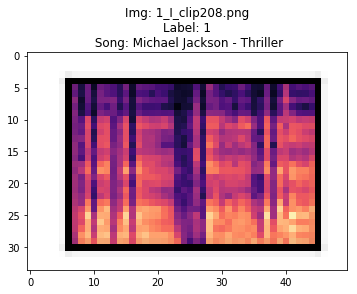

In [22]:
i=27
row = ms_df.iloc[i] #test img
img = imageio.imread(ms_dir + row.fname)
imgplot = plt.imshow(img)
plt.title('Img: {}\nLabel: {}\n Song: {}'.format (row.fname, row.label, LABEL_DICT[row.label]))
plt.show()

In [23]:
#PLay clip associated with above image
filename = audio_dir + (os.path.splitext(row.fname)[0] + '.wav')
clip, sample_rate = librosa.load(filename, sr=None)
Audio(clip, rate=sample_rate)

In [24]:
hf = h5py.File("data.h5", "w")
hf.create_dataset("train_images", data=X_train)
hf.create_dataset("train_labels", data=y_train)
hf.close()

## References
[1] Fast.ai experimental audio classification module: https://github.com/sevenfx/fastai_audio <br/>
[2] Article for fast.ai audio module: https://towardsdatascience.com/audio-classification-using-fastai-and-on-the-fly-frequency-transforms-4dbe1b540f89 <br/>
[3] A CNN architecture for classifying digits with spectrograms: https://medium.com/x8-the-ai-community/audio-classification-using-cnn-coding-example-f9cbd272269e <br/> https://github.com/Jakobovski/free-spoken-digit-dataset